In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
from sympy.physics.quantum.constants import hbar

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import animation
mpl.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg-static\\ffmpeg-20160919-11777eb-win64-static\\bin\\ffmpeg.exe'

In [9]:
me = 1


def potential(psihat):
    psi = np.fft.irfft2(psihat)
    return np.fft.rfft2((xx**2+yy**2)*psi)
def rhs(psihat, t):
     return -(0.0+1.0j)*ksq*(psihat) - (0.0+1.0j)*potential(psihat)

def rkint(f0, t0, h):
    k1 = rhs(f0, t0)
    f1 = f0 + k1 * h / 2
    k2 = rhs(f1, t0+h/2)
    f2 = f0 + k2 * h / 2
    k3 = rhs(f2, t0+h/2)
    f3 = f0 + k3 * h
    k4 = rhs(f3, t0+h)
    m = k4/6 + k3/3 + k2/3 + k1/6
    m
    return f0 + m*h

In [10]:
step = 601
tmax = 2
tt = np.linspace(0.0, tmax, step)
tt.size

601

In [16]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.linspace(-np.pi, np.pi, 256)
xx, yy = np.meshgrid(x, y)
psi = np.exp(xx**2/36) * np.exp(yy**2/36)

kx = np.fft.rfftfreq(256)
ky = np.fft.fftfreq(256)
kkx, kky = np.meshgrid(kx, ky)
ksq = kkx**2 + kky**2
psihat = np.fft.rfft(psi)

resulthat = [psihat]
h = tmax / (step - 1)
for tval in tt:
    resulthat.append(rkint(resulthat[-1], tval, h))
resulthat = np.array(resulthat)

In [17]:
result = np.fft.irfft(resulthat)
result.shape

(602, 256, 256)

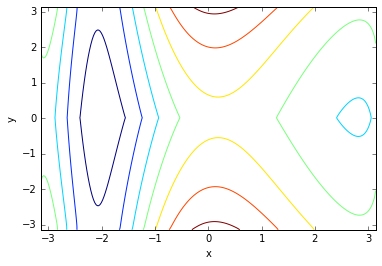

In [18]:
plt.contour(xx, yy, result[100])
plt.ylabel('y')
plt.xlabel('x')



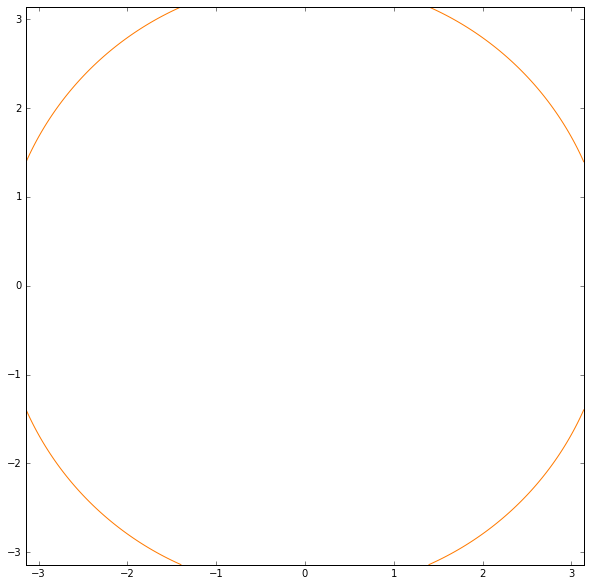

In [19]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()  
plt.xlabel('x')
plt.ylabel('y')

totalmax = np.max([np.max(np.abs(result)) for frame in result])
levels = np.linspace(-totalmax, totalmax, 10)

def animatex(i):
    ax.clear()
    return plt.contour(xx, yy, result[i], levels)
def animatev(i):
    ax.clear()
    return plt.contour(xx, yy, result[i])

anim = animation.FuncAnimation(fig, animatex, frames=len(tt), blit=False)
mywriter = animation.FFMpegWriter()

anim.save("gaussianSHO.mp4", writer=mywriter)
    